In [10]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm

In [11]:
file_path_147 = '/content/amc_200_qpsk_8psk.mat'
mat_data = h5py.File(file_path_147, 'r')
for dataset_name in mat_data:
    print(dataset_name)
X = mat_data['rcd_y'][:]
y = mat_data['lbl'][:]
mat_data.close()

lbl
rcd_y
snrs


In [12]:
y = np.squeeze(y)
print(y.shape)

(10000,)


In [13]:
X.shape
X1 = X.T

Text(0.5, 1.0, 'Constellation Diagram 8QPSK')

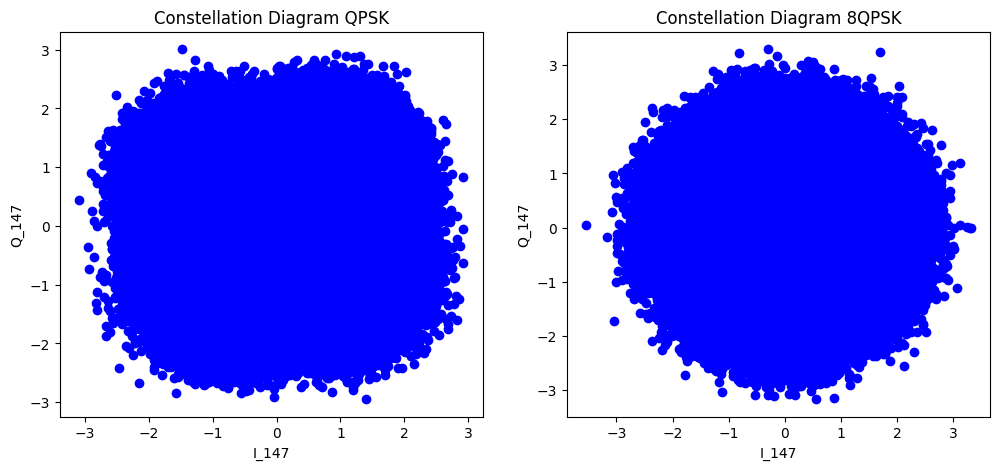

In [14]:
I_QPSK = []
Q_QPSK = []
I_8QPSK = []
Q_8QPSK = []
for i in range(10000):
  for j in range(200):
    if(y[i]==1):
      I_QPSK.append(X1[i][j]['real'])
      Q_QPSK.append(X1[i][j]['imag'])
    else:
      I_8QPSK.append(X1[i][j]['real'])
      Q_8QPSK.append(X1[i][j]['imag'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(I_QPSK, Q_QPSK, marker='o', color='b')
ax1.set_xlabel('I_147')
ax1.set_ylabel('Q_147')
ax1.set_title('Constellation Diagram QPSK')

ax2.scatter(I_8QPSK, Q_8QPSK, marker='o', color='b')
ax2.set_xlabel('I_147')
ax2.set_ylabel('Q_147')
ax2.set_title('Constellation Diagram 8QPSK')


In [15]:
df = []
for i in range(10000):
  t = []
  for j in range(200):
    r = np.abs(X1[i][j]['real'] + 1j * X1[i][j]['imag'])*(np.angle(X1[i][j]['real'] + 1j * X1[i][j]['imag']))
    t.append(r)
  df.append(t)
X = np.array(df)
X = pd.DataFrame(X)
mean_values = X.mean(axis=1)
std_dev_values = X.std(axis=1)
X1 = pd.DataFrame({'Mean': mean_values, 'Std Dev': std_dev_values})

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)



In [17]:
classifier1 = LogisticRegression(max_iter=1000)
classifier1.fit(X_train_normalized, y_train)
y_pred = classifier1.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion MatriX:\n", confusion_mat)

Accuracy: 0.586
Confusion MatriX:
 [[591 421]
 [407 581]]


In [18]:
classifier2= svm.SVC(kernel='linear')
classifier2.fit(X_train_normalized, y_train)
y_pred = classifier2.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion MatriX:\n", confusion_mat)

Accuracy: 0.588
Confusion MatriX:
 [[601 411]
 [413 575]]
